## Homework 11 Assignment 1

In [1]:
# import packages and set up working environment
import geopandas as gp
import pandas as pd
from geopandas import GeoDataFrame
from fiona.crs import from_epsg
import shapely
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# find shapefile and set epsg
shape_path="/Users/kaylynlevine/Desktop/census/nycb2010_16c/nycb2010.shp"
ct_shape = GeoDataFrame.from_file(shape_path)
ct_shape.crs = from_epsg(2263)


In [3]:
# inspect data
ct_shape.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((962269.1260375977 173705.5001831055,..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,"POLYGON ((964642.2676391602 161835.2651977539,..."
2,50027001000,5,Staten Island,1000,002700,150406.784296,1703.381058,"POLYGON ((963363.1166381836 167356.3334350586,..."
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((960069.9965820312 161953.6936035156,..."
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,"POLYGON ((963023.891784668 158246.7521972656, ..."


In [4]:
# extract just brooklyn census tracts
ct_brooklyn = ct_shape[ct_shape["BoroName"] == 'Brooklyn']
ct_brooklyn.index=ct_brooklyn.index.astype(str)
ct_brooklyn.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
5175,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,"POLYGON ((982421.0634155273 178133.8510131836,..."
5176,30003011000,3,Brooklyn,1000,000301,63365.958361,1006.913933,"POLYGON ((985596.1882324219 193858.6517944336,..."
5177,30005011000,3,Brooklyn,1000,000501,116303.194723,1431.900698,"POLYGON ((986271.9053955078 193612.9270019531,..."
5178,30011001000,3,Brooklyn,1000,001100,54802.306859,951.657541,"POLYGON ((988369.8604125977 192442.1943969727,..."
5179,30015001000,3,Brooklyn,1000,001500,79196.530872,1129.348482,"POLYGON ((988949.616394043 193714.8265991211, ..."


In [5]:
# convert coordniates to dms
ct_latlon = ct_brooklyn.to_crs(epsg=4326)
ct_latlon.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
5175,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,POLYGON ((-74.00659158337982 40.65561273365177...
5176,30003011000,3,Brooklyn,1000,000301,63365.958361,1006.913933,POLYGON ((-73.99514512602698 40.69877384567194...
5177,30005011000,3,Brooklyn,1000,000501,116303.194723,1431.900698,POLYGON ((-73.99270830309769 40.69809925981345...
5178,30011001000,3,Brooklyn,1000,001100,54802.306859,951.657541,"POLYGON ((-73.98514306089652 40.6948851429698,..."
5179,30015001000,3,Brooklyn,1000,001500,79196.530872,1129.348482,POLYGON ((-73.98305147125492 40.69837793354038...


In [6]:
# define CUSP point and set crs (using google maps search for 1 Metrotech Center)
cusp = shapely.geometry.Point(-73.9885938,40.6932161)
cusp.crs = from_epsg(4326)

In [7]:
# find which census tract cusp_point is located within
# use geometry.intersects
cusp_ct = ct_latlon[ct_latlon.geometry.intersects(cusp)].BCTCB2010.values[0]
cusp_ct

u'30011001002'

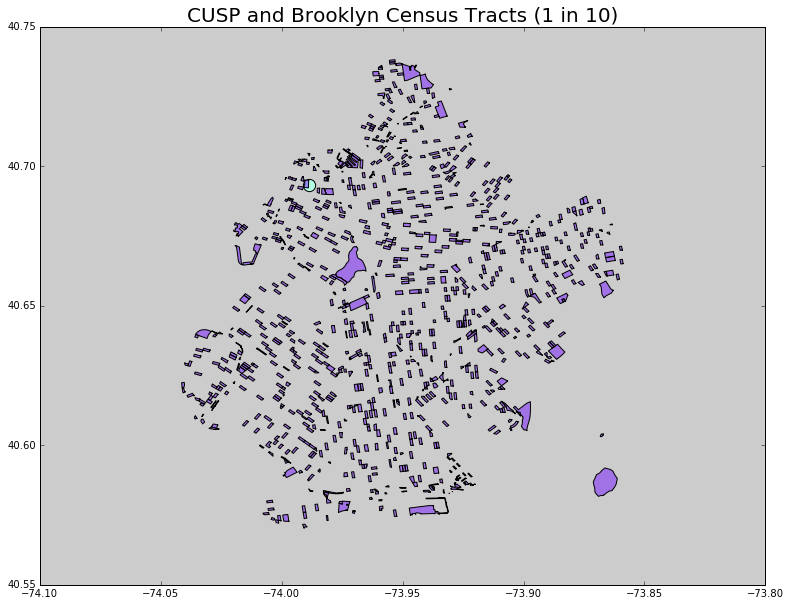

In [8]:
# plot every 10th census tract in Brooklyn along with CUSP
f, ax = pl.subplots(figsize=(13,10))
ax.set_axis_bgcolor("#cccccc")
pl.scatter(-73.9885938,40.6932161, s=150, c='#b3ffe6')
ct_latlon[::10].plot(ax=ax, color="#751aff")
pl.title("CUSP and Brooklyn Census Tracts (1 in 10)", fontsize = 20)


#### Figure Caption:
This plot shows 1 in every 10 census tracts for the borough of Brooklyn. It also shows the location of CUSP (1 Metrotech Center) in relation to the census tracts. 